# Multiple dice rolling simulator
This quick script simulates rolling any number (N) of M-sided dice, then plots the distribution of rolls

### Load packages

In [2]:
# First import librarires
# numpy will be used for our random number generator, and for quickly bucketing the histogram
# matplotlib is for plotting the histogram

import numpy as np
import matplotlib.pyplot as plt

### Define helpers

In [3]:
# Setup a default random number generator from numpy
# since no seed is specified, a random seed will be pulled fresh from the OS
rng = np.random.default_rng()

In [4]:
# Helper to roll the dice
# input is: number of desired rolls, the number of dice being used, and (optional) number of sides for each dice
# ouptut is: n x m array with n being the number of dice and m being the number of rolls

def roll_dice(n_throws, n_dice, n_sides=6):
    result = []
    for i in range(n_dice):
        # here rng.integers calls the random number generator to pull integers from a uniform distribution
        result.append(rng.integers(low = 1, high = n_sides, size = n_throws, endpoint=True))
    
    return result

In [5]:
# Let's test the dice roller

n_throws = 10
n_dice = 2
# here we can leave out 'n_sides' since we specified a default in the function definition
dice_rolls = roll_dice(n_throws, n_dice)

# let's inspect the output.
# we expect a 2x10 array (2 dice, rolled 10 times each) of values ranging 1 to 6 (since we are rolling a d6)
# Note: each time you re-run this cell new rolls will be generated
print(dice_rolls)

[array([1, 2, 5, 3, 5, 2, 1, 5, 2, 3]), array([1, 3, 2, 4, 6, 5, 5, 3, 1, 4])]


In [6]:
# Helper to add the dice rolls together
# input is a j x i array with j being the number of dice and i being the number of throws
# output is a 1 x i array
def sum_throws(roll_array):
    n_dice = len(roll_array)
    result = []
    for i in range(len(roll_array[0])):
        this_roll = 0
        for j in range(n_dice):
            this_roll += roll_array[j][i]
        result += [this_roll]
    
    return result

In [7]:
# Let's test the sum_throws helper
n_throws = 10
n_dice = 2
total = sum_throws(roll_dice(n_throws, n_dice))

# Let's inspec the output
# we expect a 1 x 10 array of values ranging from 2 to 12
print(total)

[8, 8, 7, 7, 10, 10, 11, 10, 3, 8]


In [8]:
# Let's define a helper to create histograms quickly
# input will be initial parameters
# no ouput returned, but it will show a plot

def quick_dice_histo_basic(n_rolls, n_dice, n_sides):
    max_val = n_dice * n_sides
    
    # generate the dice rolls
    samples = sum_throws(roll_dice(n_rolls, n_dice, n_sides))
    
    # bucket rolls into histogram
    histo, edges = np.histogram(samples, bins=np.arange(1,(max_val + 2)))
    
    # plot histogram
    plt.bar(edges[:max_val], histo)
    plt.show()

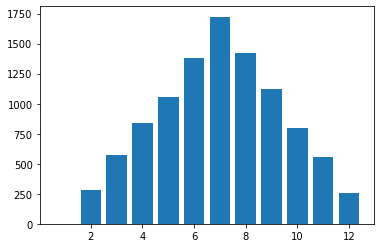

In [9]:
quick_dice_histo_basic(10000, 2, 6)

In [10]:
# Let's clean this up a bit by normalizing the histo, plotting percentages, and drawing gridlines

# normalize values in a list
def normalize_histo(histo):
    total = 0
    for val in histo:
        total += val
        
    histo_nl = [i/total for i in histo]
    return histo_nl

# this will help us label our yaxis
import matplotlib.ticker as mticker

def quick_dice_histo(n_rolls, n_dice, n_sides):
    max_val = n_dice * n_sides
    
    # generate the dice rolls
    samples = sum_throws(roll_dice(n_rolls, n_dice, n_sides))
    
    # bucket rolls into histogram
    histo, edges = np.histogram(samples, bins=np.arange(1,(max_val + 2)))
    histo_nl = normalize_histo(histo)
    
    # plot histogram
    plt.bar(edges[:max_val], histo_nl)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=0))
    ax.set_title(str(n_dice)+"d"+str(n_sides))
    ax.yaxis.grid()
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")
    plt.show()

## Analyzing different distributions

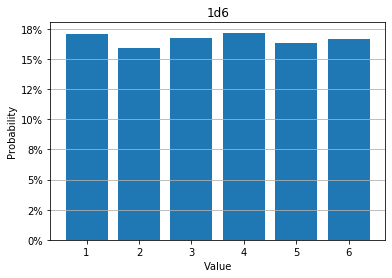

In [11]:
# 1xd6
quick_dice_histo(10000, 1, 6)

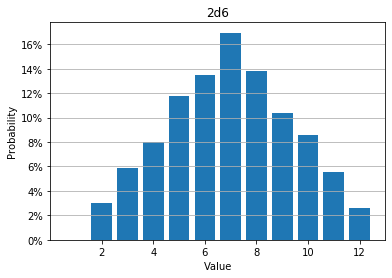

In [12]:
# 2xd6
quick_dice_histo(10000, 2, 6)

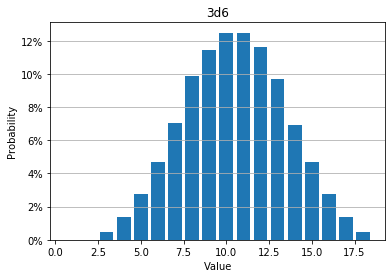

In [13]:
# 3xd6
quick_dice_histo(100000, 3, 6)

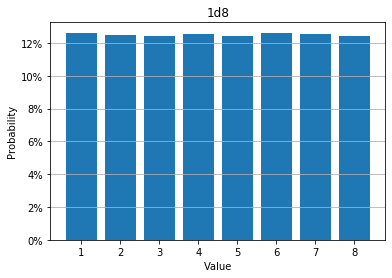

In [14]:
# 1xd8
quick_dice_histo(100000, 1, 8)

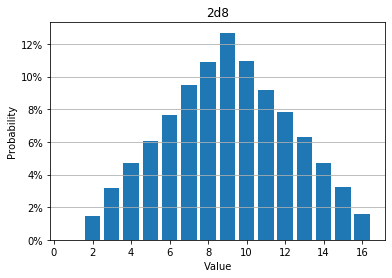

In [15]:
# 2xd8
quick_dice_histo(100000, 2, 8)

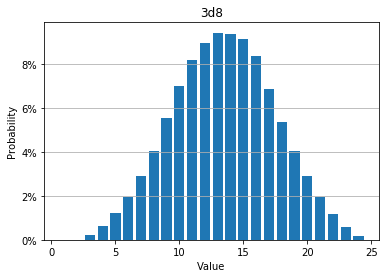

In [16]:
# 3xd8
quick_dice_histo(100000, 3, 8)

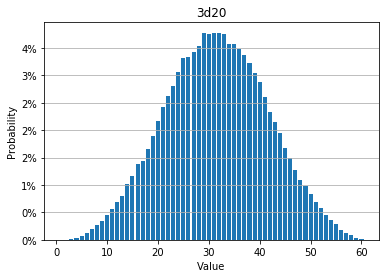

In [17]:
# 3xd20
quick_dice_histo(100000, 3, 20)

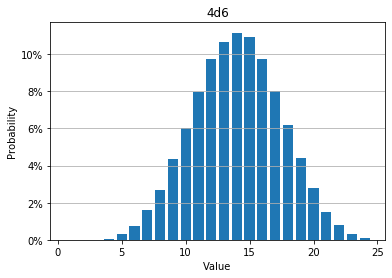

In [18]:
# 4xd6
quick_dice_histo(100000, 4, 6)

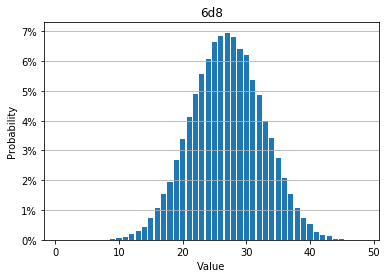

In [40]:
# 6xd8
quick_dice_histo(100000, 6, 8)

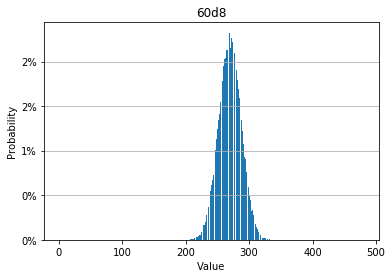

In [41]:
# 60xd8
quick_dice_histo(100000, 60, 8)

## Plotting them together

In [20]:
def plot_4_together(n_sides, n_rolls=100000):
    fig, ax = plt.subplots(1, 4, figsize=(15, 4))
    fig.suptitle("Probability Distributions for Multiple d"+str(n_sides)+" Dice", fontsize=18, y=1.08)

    prob_max = 0
    for n_dice in range(1,5):
        max_val = n_dice * n_sides

        # generate the dice rolls
        samples = sum_throws(roll_dice(n_rolls, n_dice, n_sides))
        # bucket rolls into histogram
        histo, edges = np.histogram(samples, bins=np.arange(1,(max_val + 2)))
        histo_nl = normalize_histo(histo)

        # plot histogram
        ax[n_dice-1].bar(edges[:max_val], histo_nl)
        ax[n_dice-1].set_title(str(n_dice)+"d"+str(n_sides))
        ax[n_dice-1].set_xlabel("Value Thrown")
        #ax[n_dice-1].set_ylabel("Value Thrown")
        if n_dice == 1: 
            ax[n_dice-1].set_ylabel("Probability")
            prob_max = max(histo_nl)
        ax[n_dice-1].yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=0))
        ax[n_dice-1].yaxis.grid()


    plt.show()

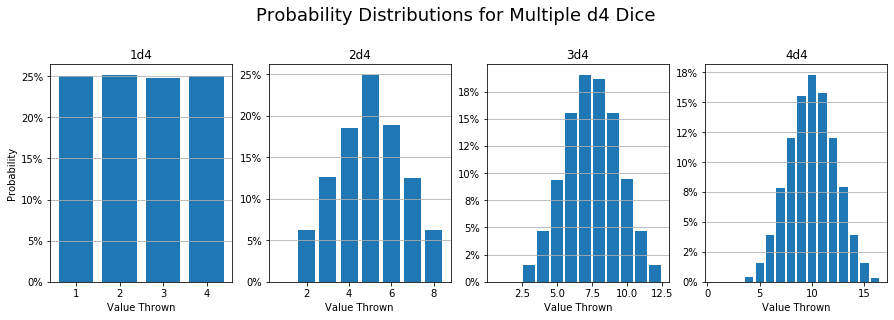

In [22]:
plot_4_together(4)

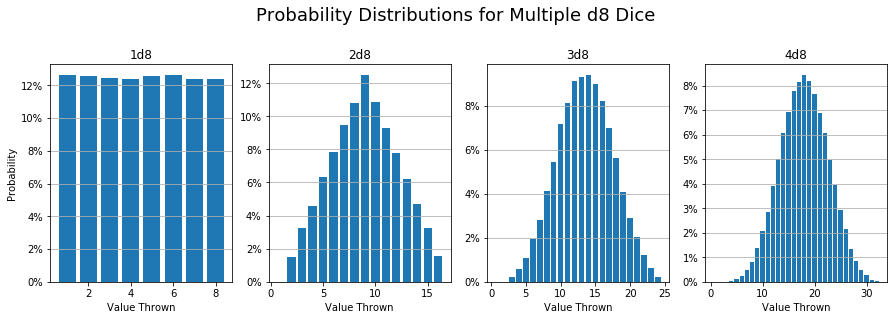

In [24]:
plot_4_together(8)

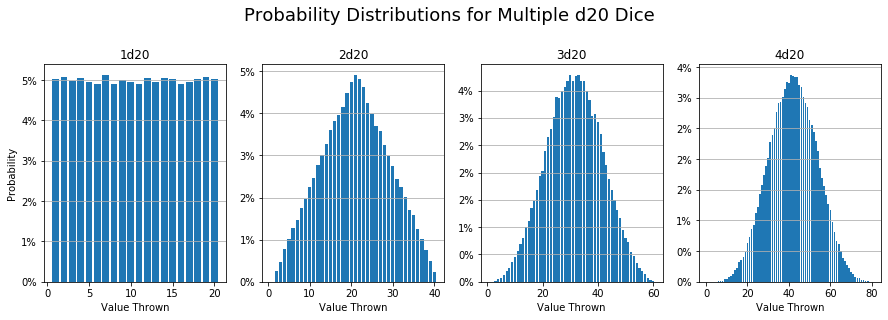

In [25]:
plot_4_together(20)

## Conclusion

Looking at these distributions side-by-side we can start to note some properties
- As the number of dice (n) increases the distribution shape changes from flat (n=1), to linear (n=2), to polynomial (n=3+)
- The number of sides doesn't change this fundamental distribution brought by number of dice
- The maximum probability for any one result decreases with number of dice 
- The preference for the median value increases with number of dice, giving us an interesting insight:
The sum of rolls of any number n of s-sided dice converges towards $\frac{n(s+1)}{2}$ as n reaches infinity

Opportunites to expand
- Include error bars on results
- Find best mean and standard deviation of each histo
- Write and test a Hypothesis Test whether the distributions are Normal
- Find the best distribution function to fit each histo